In [3]:
!pip3 install unidecode

In [4]:
import sys
import re
from unidecode import unidecode
import string

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

import random

## Simplificación texto

In [5]:
def clean_text(txt): 

    s = txt.lower()
    s = re.sub('\n', ' ', s)
    s = unidecode(s)
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = re.sub(' +', ' ', s)
    
    return s

In [6]:
txt = open('quijote.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
open("new_txt.txt", "w").write(cleaned);
print(cleaned)

el ingenioso hidalgo don quijote de la mancha tasa yo juan gallo de andrada escribano de camara del rey nuestro senor de los que residen en su consejo certifico y doy fe que habiendo visto por los senores del un libro intitulado el ingenioso hidalgo de la mancha compuesto por miguel de cervantes saavedra tasaron cada pliego del dicho libro a tres maravedis y medio el cual tiene ochenta y tres pliegos que al dicho precio monta el dicho libro docientos y noventa maravedis y medio en que se ha de vender en papel y dieron licencia para que a este precio se pueda vender y mandaron que esta tasa se ponga al principio del dicho libro y no se pueda vender sin ella y para que dello conste di la presente en valladolid a veinte dias del mes de deciembre de mil y seiscientos y cuatro anos juan gallo de andrada testimonio de las erratas este libro no tiene cosa digna que no corresponda a su original en testimonio de lo haber correcto di esta fee en el colegio de la madre de dios de los teologos de 

## Longitud media de textos


In [7]:
def long_media(txt):
    
    words_in_text = txt.split() #acaso se fue y te dejo ilusionada
    chars_in_text = [len(w) for w in words_in_text] 
    
    return sum(chars_in_text)/len(words_in_text)

In [8]:
txt = open('quijote.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
w = long_media(cleaned)
print(w)

txt = open('miserables_clean.txt')
w = long_media(txt.read())
print(w)

txt = open('orlando_clean.txt')
w = long_media(txt.read())
print(w)

txt = open('copperfield_clean.txt')
w = long_media(txt.read())
print(w)

4.3037288669123726
4.718912725907569
4.292121189339548
4.170232977688827


## Estadísticas de letras

In [22]:
def source_fromtext(txt):
    
    letras = [*txt]           # se puede quitar esto en vdd
    out = defaultdict(int)
    for letra in letras:
        esta = 0
        for i in out:
            if i == letra:
                out[i] += 1 
                esta = 1
                break
        if esta == 0:
            out[letra] = 1
    
    return out

In [23]:
def histogram(txt):
    
    letras = txt
    y = np.arange(len(letras))
    count = list(txt.values())
    
    plt.bar(y, count, align = 'center', color = 'purple')
    plt.xticks(y, letras)
    plt.ylabel('Las veces que aparece')
    plt.title('Título')
    plt.show()

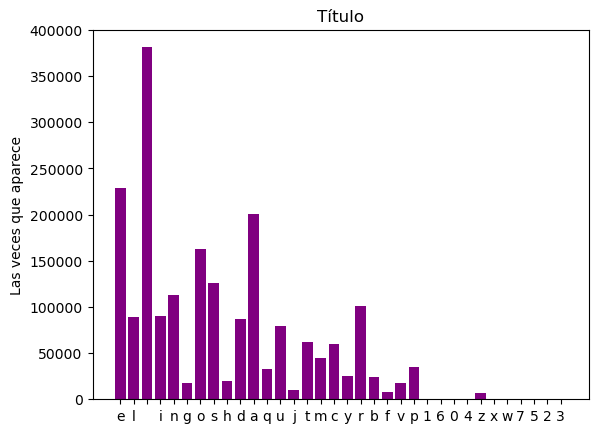

In [24]:
txt = open('quijote.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
categorized = source_fromtext(cleaned)
#print(categorized)
histogram(categorized)
x = random_text(cleaned, len(cleaned))
#print(x)

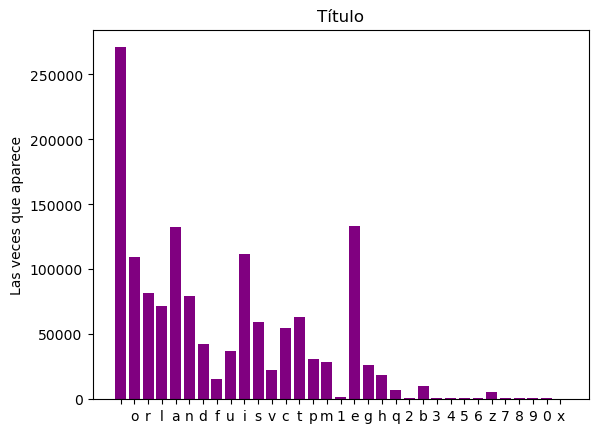

In [25]:
txt = open('orlando.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
categorized = source_fromtext(cleaned)
#print(categorized)
histogram(categorized)
x = random_text(cleaned, len(cleaned))
#print(x)

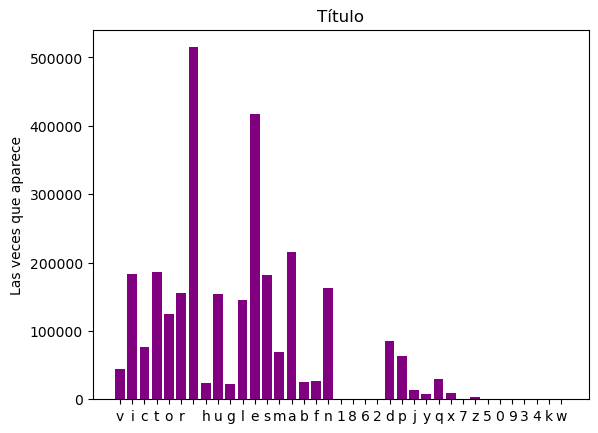

In [26]:
txt = open('miserables.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
categorized = source_fromtext(cleaned)
#print(categorized)
histogram(categorized)
x = random_text(cleaned, len(cleaned))
#print(x)

In [ ]:
txt = open('copperfield.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
categorized = source_fromtext(cleaned)
#print(categorized)
histogram(categorized)
x = random_text(cleaned, len(cleaned))
#print(x)

## Texto aleatorio

In [13]:
def random_text(txt, n):
    
    rand_letters = ''.join(random.choices(txt, k=n))
    
    return rand_letters

In [14]:
txt = open('quijote.txt','r', encoding="utf-8")
cleaned = clean_text(txt.read())
categorized = source_fromtext(cleaned)
#print(categorized)
#histogram(categorized)
x = random_text(cleaned, len(cleaned))
print(x)

emnuaesmriauss o eesyhe araoal ueoolyegq aoost dzdrqseasaisnelf i   aobloii oe hreoairae  eecs ysnoroasa oaalv uvnaei naocaercors vel asreqn lost sifg laeelnueloaalanaaertaa aoe lbi cussuofm qp qaselecn naasbnaojao a lt eeiro  uqaan  trsarnmn blrdtua dyn e  py arp a qrth  csnaodoqmcunaoyc c cerl hpocenlut etcyn aasdqespur aljeu melvuqcum p poaudmomen  e ocadl ae  nol ad au cdbuonqaeteluluro sdenes snemaegp ajo eb hbe oo vl uly oec  eue njavcoqpqqildslta e ora d qaca taneeuadv vlu o  r ae aleeenlnalio ie teaa   e oed r dolilsbuam  iay qaeorm atr arn en tmeeqidetmtanr caa soeao oeu art emr eoseqaofrn ecan  e   leaboy  dtps sa dticnror   ca  maoeuq aoev nbq uunba  un dogeoljlstaaemdsdnneisqserand ta euntaueabesra alyeaaqdauqaoud sea dsejdeus  shqp reehesodn adodtoaesvis to g l tsov sdiasaeeerti uepbnou isoiaoc eaumouooen yueasa lotenoe tq ot     as  e oun caeaepucmaaa   d mn tep un tlm rres anties oglsn  odj  aoen or   eiu loe  loo qmreaacrdeaguuacsodairzhqbaz te aoead ves lrliganeeei neo

## Texto aleatorio con contexto

In [15]:
def random_text_markov(txt, k, n):
    # Create the dictionary of substrings and the following characters
    if k == 0:
        return random_text(txt, n)
    markov_dict = {} 
    for i in range(len(txt) - k):
        substring = txt[i:i+k]
        next_char = txt[i+k]
        if substring not in markov_dict:
            markov_dict[substring] = []
        markov_dict[substring].append(next_char)

    # Generate the random text
    current_substring = random.choice(list(markov_dict.keys()))
    result = current_substring
    for i in range(n - k):
        if current_substring not in markov_dict:
            break
        next_char = random.choice(markov_dict[current_substring])
        result += next_char
        current_substring = result[-k:]

    return result

In [17]:
#txt = open('quijote.txt','r', encoding="utf-8")
cleaned = "Setze jutges d’un jutjat mengen fetge d’un penjat."
w = random_text_markov(cleaned,0,40)
print(w)
print(len(w))

dnteeejme e ndujep.nj.uzn  euen ssdja  n
40


In [20]:
txt = open("quijote_clean.txt","r",encoding="utf-8").read(); txt[:1000]

'el ingenioso hidalgo don quijote de la mancha tasa yo juan gallo de andrada escribano de camara del rey nuestro senor de los que residen en su consejo certifico y doy fe que habiendo visto por los senores del un libro intitulado el ingenioso hidalgo de la mancha compuesto por miguel de cervantes saavedra tasaron cada pliego del dicho libro a tres maravedis y medio el cual tiene ochenta y tres pliegos que al dicho precio monta el dicho libro docientos y noventa maravedis y medio en que se ha de vender en papel y dieron licencia para que a este precio se pueda vender y mandaron que esta tasa se ponga al principio del dicho libro y no se pueda vender sin ella y para que dello conste di la presente en valladolid a veinte dias del mes de deciembre de mil y seiscientos y cuatro anos juan gallo de andrada testimonio de las erratas este libro no tiene cosa digna que no corresponda a su original en testimonio de lo haber correcto di esta fee en el colegio de la madre de dios de los teologos de

In [21]:
src = source_fromtext(txt); print(src)

defaultdict(<class 'int'>, {'e': 229191, 'l': 89143, ' ': 381208, 'i': 90077, 'n': 112683, 'g': 17225, 'o': 162514, 's': 125728, 'h': 19920, 'd': 87240, 'a': 200499, 'q': 32483, 'u': 79560, 'j': 10530, 't': 61749, 'm': 44658, 'c': 59437, 'y': 25115, 'r': 100955, 'b': 24147, 'f': 7581, 'v': 17856, 'p': 35465, 'z': 6491, 'x': 377, 'w': 2})
